# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [1]:
import pandas as pd

df = pd.read_csv('/Users/mackenziemcdermott/Desktop/SCHOOL/Intro to Data Science/Week 5/churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [2]:
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

In [3]:
automl = ClassificationExperiment() #setup(df, target='Diabetes')

In [4]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,1348
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Ordinal features,1
9,Numeric features,3


In [5]:
automl

Running autoML to find the best model.

In [6]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7961,0.8368,0.5015,0.6528,0.5663,0.4361,0.4432,0.3190
ada,Ada Boost Classifier,0.7957,0.8356,0.5083,0.6480,0.5677,0.4370,0.4436,0.2720
lr,Logistic Regression,0.7925,0.8339,0.5214,0.6350,0.5713,0.4363,0.4408,0.8240
lda,Linear Discriminant Analysis,0.7899,0.8256,0.5268,0.6261,0.5709,0.4333,0.4369,0.1200
ridge,Ridge Classifier,0.7874,0.0000,0.4549,0.6443,0.5320,0.3997,0.4107,0.1180
lightgbm,Light Gradient Boosting Machine,0.7850,0.8243,0.5122,0.6152,0.5581,0.4178,0.4214,0.4270
rf,Random Forest Classifier,0.7706,0.7914,0.4900,0.5811,0.5307,0.3806,0.3836,0.3950
knn,K Neighbors Classifier,0.7592,0.7405,0.4289,0.5648,0.4858,0.3327,0.3391,0.1230
et,Extra Trees Classifier,0.7554,0.7725,0.4809,0.5444,0.5099,0.3480,0.3496,0.3800
dummy,Dummy Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1060


gbc is the best accuracy

In [7]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1348, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

I can now plot a variety of information about the best model

In [9]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

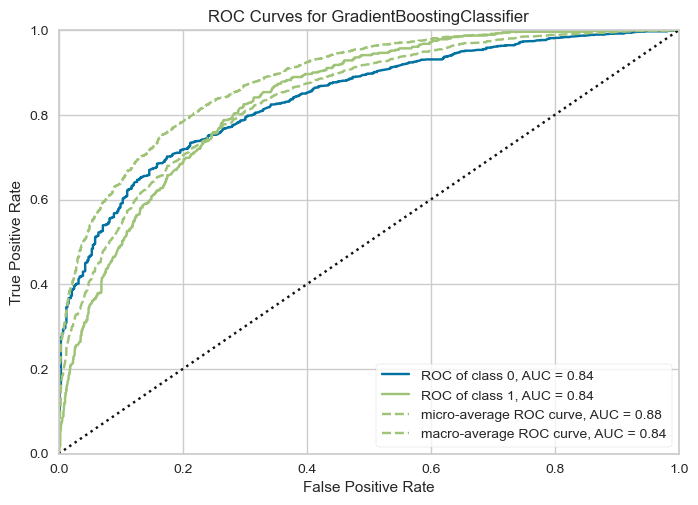

In [10]:
automl.plot_model(best_model)

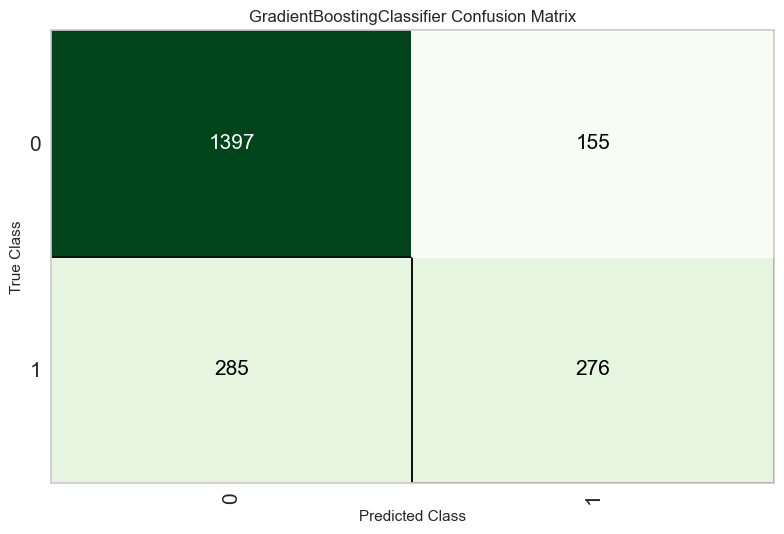

In [11]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [12]:
df.iloc[-2:-1].shape

(1, 7)

In [13]:
df.iloc[-2].shape

(7,)

In [14]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,1,Yes,0.5621


This creates two new columns, prediction_label and prediction_score. 

In [15]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8124,0.8644,0.8124,0.8032,0.8042,0.4817,0.4884


In [16]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.850000,29.850000,0,Yes,0.8403
5575-GNVDE,34,Yes,One year,Mailed check,56.950001,1889.500000,0,No,0.9454
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.849998,108.150002,1,No,0.5985
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.299999,1840.750000,0,No,0.9053
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.699997,151.649994,1,Yes,0.5618


In [17]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_

In [18]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [19]:
new_data = df.iloc[-2:-1]

In [20]:
new_pycaret.predict_model(loaded_model, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,1,Yes,0.5621


In [21]:
from IPython.display import Code

Code('predict_churn.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
   # predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
   # predictions['Churn_prediction'].replace({1: 'Yes', 0: 'No'}, inplace=True)
    return predictions #['Churn_prediction']


if __name__ == "__main__":
    df = load_data('/Users/mackenziemcdermott/Desktop/SCHOOL/Intro to Data Science/Week 5/churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [22]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
            tenure PhoneService        Contract              PaymentMethod  \
customerID                                                                   
7590-VHVEG       1           No  Month-to-month           Electronic check   
5575-GNVDE      34          Yes        One year               Mailed check   
3668-QPYBK       2          Yes  Month-to-month               Mailed check   
7795-CFOCW      45           No        One year  Bank transfer (automatic)   
9237-HQITU       2          Yes  Month-to-month           Electronic check   
...            ...          ...             ...                        ...   
6840-RESVB      24          Yes        One year               Mailed check   
2234-XADUH      72          Yes        One year    Credit card (automatic)   
4801-JZAZL      11           No  Month-to-month           Electronic check   
8361-LTMKD       4          Yes  Month-to-month               Mailed check 

<Figure size 800x550 with 0 Axes>

# Summary

In this assignment, the primary objective was to determine the most effective machine learning algorithm for a given dataset using PyCaret. The process began with the loading of the churn dataset using pd.read_csv. PyCaret's ClassificationExperiment class played a central role in automating various aspects of the machine learning workflow. After initializing the experiment with automl, the dataset was set up for analysis with automl.setup(df, target="Churn"). The model comparison step with automl.compare_models() identified the "Radiant Boosting Classifier" as the best-performing model with an accuracy of 0.7961. Further evaluation of this model included assessing feature importance and ROC curves using automl.evaluate_model(best_model). Predictions were made on specific data points, and a confusion matrix was generated to analyze true positives, true negatives, false positives, and false negatives. The best model was saved for future use with automl.save_model(best_model, 'pycaret_model') and subsequently loaded into a new experiment instance. Predictions on new data were made using the loaded model. The assignment concluded by displaying the code from predict_churn.py using Code('predict_churn.py') and executing the code with %run predict_churn.py, which revealed one false positive and one false negative among the observed model's predictions.